# Stock Market data prediction using Historical Data

## Importing Libraries 

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas_datareader as web


# Training and Testing for Different Stock (TATA STEEL)

# Predict next day's close price (Experimental)

In [35]:
# data_num = pd.read_csv('djia.csv')
data_num = web.DataReader('TATASTEEL.NS', data_source='yahoo', start='2020-01-01', end='2021-01-15')
data_num.reset_index(level=0, inplace=True)
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
256,2021-01-11,712.000000,688.200012,712.000000,695.650024,17024509.0,695.650024
257,2021-01-12,724.500000,691.099976,695.000000,694.900024,24525484.0,694.900024
258,2021-01-13,714.549988,693.000000,701.450012,709.150024,19353871.0,709.150024
259,2021-01-14,714.450012,697.099976,710.000000,706.349976,11540858.0,706.349976
260,2021-01-15,721.500000,697.650024,712.000000,705.900024,20688437.0,705.900024


In [36]:
openP = data_num.tail(1)['Open']
closeP = data_num.tail(1)['Close']

In [37]:
data_num['NextOpen'] = 0
# data_num['NextClose'] = 0
data_num['NextHigh'] = 0
data_num['NextLow'] = 0

In [38]:
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
256,2021-01-11,712.000000,688.200012,712.000000,695.650024,17024509.0,695.650024,0,0,0
257,2021-01-12,724.500000,691.099976,695.000000,694.900024,24525484.0,694.900024,0,0,0
258,2021-01-13,714.549988,693.000000,701.450012,709.150024,19353871.0,709.150024,0,0,0
259,2021-01-14,714.450012,697.099976,710.000000,706.349976,11540858.0,706.349976,0,0,0
260,2021-01-15,721.500000,697.650024,712.000000,705.900024,20688437.0,705.900024,0,0,0


In [39]:
for i in range(0, len(data_num) - 1):
    data_num.loc[i, 'NextOpen'] = data_num.loc[i+1, 'Open']   
#     data_num.loc[i, 'NextClose'] = data_num.loc[i+1, 'Close']
    data_num.loc[i, 'NextHigh'] = data_num.loc[i+1, 'High']
    data_num.loc[i, 'NextLow'] = data_num.loc[i+1, 'Low']




In [40]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
0,2020-01-01,476.500000,464.799988,473.000000,467.750000,12100530.0,455.932159,472.000000,487.799988,472.000000
1,2020-01-02,487.799988,472.000000,472.000000,484.850006,21674961.0,472.600128,483.000000,486.200012,479.450012
2,2020-01-03,486.200012,479.450012,483.000000,483.700012,12956863.0,471.479187,480.000000,480.000000,470.549988
3,2020-01-06,480.000000,470.549988,480.000000,473.250000,9601608.0,461.293213,475.500000,484.600006,473.549988
4,2020-01-07,484.600006,473.549988,475.500000,476.100006,13195788.0,464.071198,471.649994,478.149994,467.000000
...,...,...,...,...,...,...,...,...,...,...
256,2021-01-11,712.000000,688.200012,712.000000,695.650024,17024509.0,695.650024,695.000000,724.500000,691.099976
257,2021-01-12,724.500000,691.099976,695.000000,694.900024,24525484.0,694.900024,701.450012,714.549988,693.000000
258,2021-01-13,714.549988,693.000000,701.450012,709.150024,19353871.0,709.150024,710.000000,714.450012,697.099976
259,2021-01-14,714.450012,697.099976,710.000000,706.349976,11540858.0,706.349976,712.000000,721.500000,697.650024


In [41]:
data_num = data_num[:-1]

In [42]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh,NextLow
0,2020-01-01,476.500000,464.799988,473.000000,467.750000,12100530.0,455.932159,472.000000,487.799988,472.000000
1,2020-01-02,487.799988,472.000000,472.000000,484.850006,21674961.0,472.600128,483.000000,486.200012,479.450012
2,2020-01-03,486.200012,479.450012,483.000000,483.700012,12956863.0,471.479187,480.000000,480.000000,470.549988
3,2020-01-06,480.000000,470.549988,480.000000,473.250000,9601608.0,461.293213,475.500000,484.600006,473.549988
4,2020-01-07,484.600006,473.549988,475.500000,476.100006,13195788.0,464.071198,471.649994,478.149994,467.000000
...,...,...,...,...,...,...,...,...,...,...
255,2021-01-08,727.250000,703.099976,727.000000,713.150024,19329313.0,713.150024,712.000000,712.000000,688.200012
256,2021-01-11,712.000000,688.200012,712.000000,695.650024,17024509.0,695.650024,695.000000,724.500000,691.099976
257,2021-01-12,724.500000,691.099976,695.000000,694.900024,24525484.0,694.900024,701.450012,714.549988,693.000000
258,2021-01-13,714.549988,693.000000,701.450012,709.150024,19353871.0,709.150024,710.000000,714.450012,697.099976


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = data_num.drop(['NextHigh','Date','High','Low','Adj Close','Volume','NextLow'],axis=1)
# X = data_num.drop(['Close','Adj Close'],axis=1)

y = data_num[['NextHigh','NextLow']]
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LinearRegression()
model.fit(X_train, y_train)
mscore = model.score(X_test,y_test)
mscore

0.996471198997966

In [45]:
y_pred = model.predict(X_test)

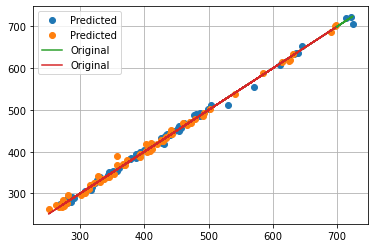

In [46]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,marker='o',linestyle='',label="Predicted")
plt.plot(y_test,y_test, label="Original")

plt.legend(loc='best')
plt.grid()
plt.show()

In [47]:
X_test.tail()

,Open,Close,NextOpen
258,701.450012,709.150024,710.000000
239,641.200012,643.400024,643.400024
63,266.000000,266.350006,267.700012
242,624.000000,595.849976,596.000000
17,480.299988,483.399994,477.750000


In [48]:
nextOpenP = 708.00000
pred = model.predict([[openP,closeP,nextOpenP]]) 

D:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [49]:
pred

array([[718.99921915, 698.85833627]])

In [50]:
diff = (nextOpenP * (100-(mscore*100))/100)
print("variance = ",diff)
ph = (pred[0][0]- diff) - nextOpenP
lp = nextOpenP   -  (pred[0][1] + diff )
if ph > lp:
    profit = ph
    print("Profit/Stock  = ",ph)
    print("Buy at :",nextOpenP,'and sell at :',(pred[0][0]) - diff )
else:
    profit = lp
    print("Profit/Stock  = ",lp)
    print("sell at :",nextOpenP,'and buy at :',(pred[0][1]) + diff )

        

variance =  2.498391109440123
Profit/Stock  =  8.500828039078215
Buy at : 708.0 and sell at : 716.5008280390782


In [51]:
stock  = int(input("How Many Stocks?\n"))
print("Your Profit is = ",profit * stock)

How Many Stocks?
200
Your Profit is =  1700.165607815643


In [1007]:
134*9



1206